In [97]:
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt

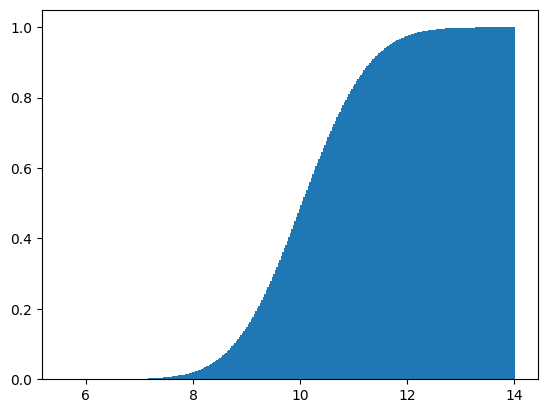

In [98]:
x = ss.rice(10).rvs(100000)
plt.hist(x, bins = 300, cumulative=True, density=True)
plt.show()

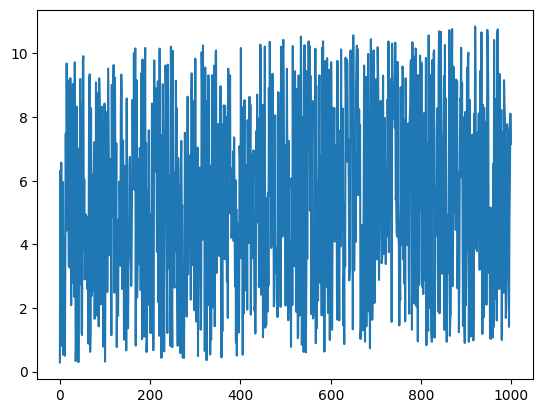

In [99]:
t = np.linspace(0, 100, 1000)
x = t * 0.01 + np.random.rand(1000) * 10 #0.01 наклон 10 шум
plt.plot(x)

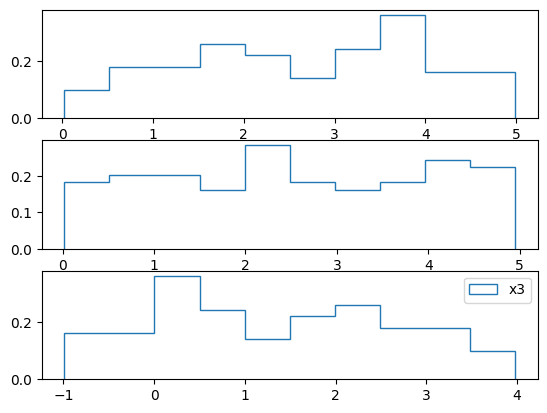

In [100]:
N = 100
x1 = np.random.rand(N) * 5
x2 = np.random.rand(N) * 5
#x3 = x1 + 4
#x3 = x1 * 10 + 4
x3 = x1 * -1 + 4
_, axs = plt.subplots(3, 1)
axs[0].hist(x1, bins=10, density=True, histtype='step', label='x1')
axs[1].hist(x2, bins=10, density=True, histtype='step', label='x2')
axs[2].hist(x3, bins=10, density=True, histtype='step', label='x3')
plt.legend()
plt.show()

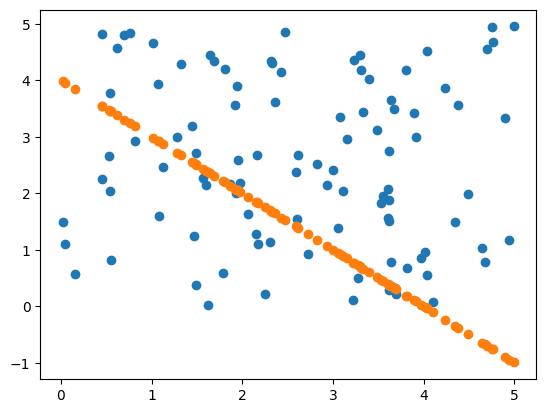

In [101]:
plt.scatter(x1, x2)
plt.scatter(x1, x3)

In [102]:
(x1 * x2).sum(), (x1 * x3).sum() 

(np.float64(658.2762205902138), np.float64(185.22901067112832))

In [103]:
(((x1 - x1.mean()) / x1.std() * (x2-x2.mean())) / x2.std()).mean(), (((x1 - x1.mean()) / x1.std()) * ((x3 - x3.mean()) / x3.std())).mean()

(np.float64(-0.05520694873815809), np.float64(-0.9999999999999996))

In [104]:
#Коэфицент корелляции пирсона
from scipy.stats import pearsonr
R1, _ = pearsonr(x1, x2)
R2, _ = pearsonr(x1, x3)
R2, R1

(np.float64(-1.0), np.float64(-0.055206948738158096))

In [105]:
f = open('test1.dat')

d = []
for i in f:
  d.append([float(x) for x in i.split()])
d = np.array(d)

for i in range(d.shape[1]):
  for j in range(i + 1, d.shape[1]):
    R, _ = pearsonr(d[:, i], d[:, j])
    if abs(R) > 0.5:
      print(i, j, R)

0 2 0.7136717988512671
0 3 0.971145375410722
1 2 0.7012506425858366
2 3 0.8601353942760076
4 5 0.9113910050433275


In [106]:
N = 100
x1 = np.random.rand(N) * 5
x2 = np.random.rand(N) * 5
x3 = np.exp(x1 * 10)
R1, _ = spearmanr(x1, x3)
from scipy.stats import spearmanr
R2, _ = spearmanr(x1, x2)
R1, R2

(np.float64(0.9999999999999999), np.float64(0.12362436243624363))

In [107]:
from scipy.stats import rankdata
x1p = rankdata(x1) #Выставление рангов
x3p = rankdata(x3)
R, _ = pearsonr(x1p, x3p)
R

np.float64(0.9999999999999996)

In [108]:
f = open('test1.dat')

d = []
for i in f:
  d.append([float(x) for x in i.split()])
d = np.array(d)

for i in range(d.shape[1]):
  for j in range(i + 1, d.shape[1]):
    R, _ = spearmanr(d[:, i], d[:, j])
    if abs(R) > 0.5:
      print(i, j, R)

0 2 0.7083176883176884
0 3 0.9725209565209566
1 2 0.6932999732999733
2 3 0.8500066300066301
4 5 0.9166090366090366


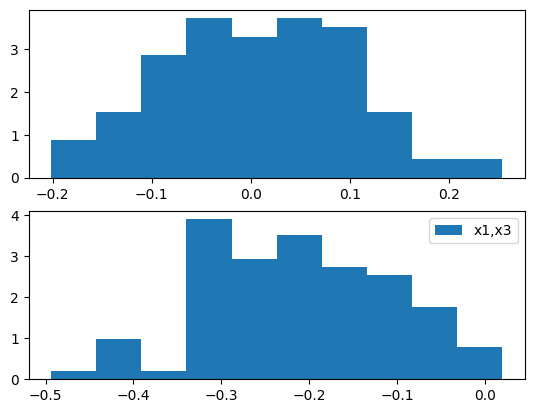

In [109]:
N=100

d1, d2 = [], []

for i in range(N):
  x1=np.random.rand(N)*5
  x2=np.random.rand(N)*5
  x3=np.exp(-x1*10)+np.random.rand(N)*0.1
  R1, _ = spearmanr(x1, x2)
  R2, _ = spearmanr(x1, x3)
  d1.append(R1)
  d2.append(R2)


fig, axs = plt.subplots(2, 1)
axs[0].hist(d1, bins=10,density = True, label='x1,x2')
axs[1].hist(d2, bins=10,density = True, label='x1,x3')
ci_d1 = np.percentile(d1, 0.025)
ci_d2 = np.percentile(d2, 0.975)
plt.legend()

array([-0.09438737,  0.17675529, -0.51523476,  0.00795523, -0.44939729,
        0.17325166,  0.08939433,  0.28001052, -0.51727171, -0.2129349 ])

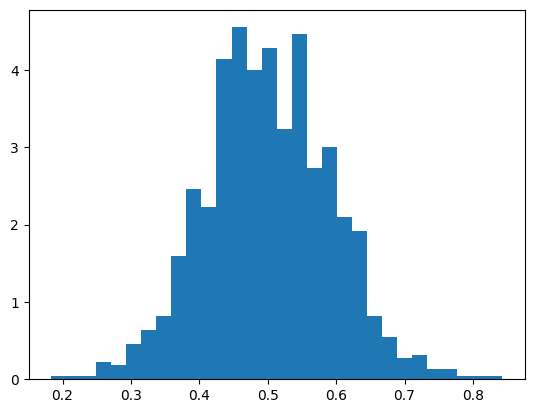

In [110]:
#Теория проверки гипотез
d = []
for i in range(1000):
  x = np.random.rand(10)
  y = x.mean()
  d.append(y)
plt.hist(d, bins=30, density=True)
x
x - 0.5 / 0.28 / np.sqrt(10)

In [111]:
x = np.random.rand(10)
xm = x.mean()
z = (x.mean() - 0.5) / 0.28 / np.sqrt(10)
print(z)
D = ss.norm(0, 1)
D.ppf(0.025), D.ppf(0.975)

-0.0395877330114519


(np.float64(-1.9599639845400545), np.float64(1.959963984540054))

In [112]:
D = ss.rice(1)
x = D.rvs(10)
print(x.mean())
z_rice = (x.mean() - 1) / (1 / np.sqrt(10))
print(z_rice)
D.ppf(0.025), D.ppf(0.975)

1.665356805432252
2.1040429618594096


(np.float64(0.2886180632552991), np.float64(3.236385773575181))

In [ ]:
D = ss.rayleigh(1)
x = D.rvs(10)
print(x.mean())
z_rice = (x.mean() - 1) / (1 / np.sqrt(10))
print(z_rice)
D.ppf(0.025), D.ppf(0.975)

2.4351590721605856
4.538371472681399


(np.float64(1.2250235898046686), np.float64(3.7162030314812387))

In [146]:
# T критерий
x = np.random.rand(10)
xm = x.mean()
z = (xm - 0.5) / 0.28 / np.sqrt(10)
D = ss.t(df = 9)
print(x.mean())
t_stat = (x.mean() - 1) / (x.std() / np.sqrt(10))
print(t_stat)
D.ppf(0.025), D.ppf(0.975)

0.4362736089500466
-8.195211280115835


(np.float64(-2.2621571628540997), np.float64(2.2621571628540993))

In [147]:
D = ss.rice(1)
x = D.rvs(10)
t_stat = (x.mean() - 1) / (x.std() / np.sqrt(10))
print(t_stat)
D = ss.t(df = 9)
D.ppf(0.025), D.ppf(0.975)

1.6940950455609907


(np.float64(-2.2621571628540997), np.float64(2.2621571628540993))

In [ ]:
nums = np.array([10,4,7,12,6,8])
t_stat = (nums.mean() - 10 ) / (nums.std() / np.sqrt(len(nums)))
print(t_stat)
D = ss.t(len(nums) - 1)
print(D.ppf(0.025), D.ppf(0.975))
if (t_stat < D.ppf(0.025) or t_stat > D.ppf(0.975)):
  print(False)
else:
  print(True)

-2.034398070733474
-2.5705818356363146 2.570581835636314
True


In [197]:
x = np.ones(100)
x[:5, ] = 0
t = (x.mean() - 0.9) / (x.std() / np.sqrt(len(x)))
print(t)
D = ss.t(len(x) - 1)
print(D.ppf(0.025), D.ppf(0.975))
if (t < D.ppf(0.025) or t > D.ppf(0.975)):
  print("!= 0.9")
else:
  print("== 0.9")

2.2941573387056136
-1.9842169515086832 1.9842169515086827
!= 0.9


In [203]:
x = np.zeros(100)
x[:5, ] = 1
t = (x.mean() - 0.03) / (x.std() / np.sqrt(len(x)))
print(t)
D = ss.t(len(x) - 1)
print(D.ppf(0.025), D.ppf(0.975))
if (t < D.ppf(0.025) or t > D.ppf(0.975)):
  print("!= 0.03")
else:
  print("== 0.03")

0.9176629354822474
-1.9842169515086832 1.9842169515086827
== 0.03


In [207]:
# Критерии для доли
# z-критерий для доли
z_doly = (x.mean() - 0.03) / (np.sqrt(0.03 * (1 - 0.03) / 100))
print(z_doly)
D = ss.norm(0, 1)
print(D.ppf(0.025), D.ppf(0.975))
if (z_doly < D.ppf(0.025) or z_doly > D.ppf(0.975)):
  print("!= 0.03")
else:
  print("== 0.03")


1.1724207635210986
-1.9599639845400545 1.959963984540054
== 0.03


In [209]:
import math
observed=np.zeros(100)
observed[:5]=1
p0=0.03
p=observed.mean()
N=observed.shape[0]
Z=(p-p0)/math.sqrt((p0*(1-p0)/N))
print('Z:',Z)
D=ss.norm(0,1)
D.ppf(0.025),D.ppf(0.975)

Z: 1.1724207635210986


(np.float64(-1.9599639845400545), np.float64(1.959963984540054))

In [217]:
Pv = 2 * (1 - D.cdf(abs(Z))) #P_value
Pv
# если p-value > 0.05, то её можно примять
# h0 нельзя отвергнуть с уровнем значимости 0.05 или 95% вероятностью
# умножает для двухсторонеего интервала на 2

np.float64(0.2410281672644321)

In [223]:
Pv = 2 * (1 - D.cdf(abs(z)))
print(Pv)
if Pv <= 0.05:
  print("Банер лучше")
else:
  print("Банер хуже")


0.9426244912953476
Банер хуже
